In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
data=pd.read_csv(r'C:\Users\ronob\Desktop\NLP\Data-analysis-project\Mall  Sales Analysis\jupyter notebooks\Cleaned_Mall_Data.csv')

In [ ]:
data=pd.read_csv(r'C:\Users\ronob\Desktop\NLP\Data-analysis-project\Mall  Sales Analysis\Cleaned_Mall_Data.csv')
data=pd.DataFrame(data)

counts= data.groupby(['gender']).value_counts()
print(counts)

In [ ]:
#analysis of customer gender type
tot_customers=len(data)
custo_count=data['gender'].value_counts()
male_percentage=(custo_count['Male']/tot_customers)*100
female_percentage=(custo_count['Female']/tot_customers)*100
#Visualising the data
labels=['Male','Female']
sizes=[male_percentage,female_percentage]
colors=['#ff9999','#66b3ff']
explode=(0.1,0)
plt.pie(sizes,explode=explode,labels=labels,colors=colors,startangle=90)
plt.axis('equal')
plt.title("Customer Gender Type Distribution")
plt.show()

In [ ]:

# Analyzing my payment method distribution across the malls
payment_total = data['payment_method'].value_counts()

plt.figure(figsize=(8, 6))
colors = ['#3f7f93', '#91bfdb', '#d9d9d9']  # Updated colors
payment_total.plot(kind='bar', color=colors)
plt.xlabel('Payment Method')
plt.ylabel('Counts')
plt.title('Method of Payment Distribution across all Malls')
plt.xticks(rotation=0)

# Adding value counts to the bar
for i, v in enumerate(payment_total):
    plt.text(i, v + 10, str(v), ha='center', va='bottom', fontsize=10)  # Adjust fontsize as needed

plt.tight_layout()
plt.show()


In [ ]:
# Create a histogram of age distribution with kernel density estimation
sns.set_palette("pastel")

sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))
sns.histplot(data=data, x='age', bins=10, color='skyblue', edgecolor='gray', kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Customers')
plt.tight_layout()
plt.show()


In [ ]:
# Assigning Age Grouping
def assign_age_group(age):
    if age < 18:
        return "children"
    elif 18 <= age < 30:
        return "20s"
    elif 30 <= age < 40:
        return "30s"
    elif 40 <= age < 50:
        return "40s"
    else:
        return "elderly"
  
    
data['age_group'] = data['age'].apply(assign_age_group)

# Preferred Malls by Age Groups
preferred_malls_by_age = data.groupby(['age_group', 'shopping_mall'])['customer_id'].count().reset_index()
preferred_malls_by_age = preferred_malls_by_age.sort_values(by=['age_group', 'customer_id'], ascending=[True, False])
preferred_malls_by_age = preferred_malls_by_age.drop_duplicates(subset='age_group', keep='first')

# Gender and Mall Frequency
gender_and_mall_frequency = data.groupby(['gender', 'shopping_mall'])['customer_id'].count().reset_index()
gender_and_mall_frequency = gender_and_mall_frequency.sort_values(by=['gender', 'customer_id'], ascending=[True, False])
gender_and_mall_frequency = gender_and_mall_frequency.drop_duplicates(subset='gender', keep='first')


print("Preferred Malls by Age Groups:")
print(preferred_malls_by_age)

print("\nGender and Preferred Mall Frequency:")
print(gender_and_mall_frequency)


In [ ]:
# Group data by age group and category, and calculate the total quantity purchased
age_category_purchase = data.groupby(['age_group', 'category'])['quantity'].sum().reset_index()

# Pivot the data to have age groups as index, categories as columns, and purchase quantity as values
age_category_pivot = age_category_purchase.pivot(index='age_group', columns='category', values='quantity')

normalized_age_category = age_category_pivot.div(age_category_pivot.sum(axis=1), axis=0)
plt.figure(figsize=(10, 6))
sns.heatmap(normalized_age_category, cmap="YlOrBr", annot=True, fmt=".2f")
plt.title('Normalized Heatmap showing Preferences of Buying Things by Age Group and Category')
plt.xlabel('Category')
plt.ylabel('Age Group')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Group data by shopping mall and gender
mall_gender_counts = data.groupby(['shopping_mall', 'gender'])['customer_id'].count().reset_index()

mall_gender_pivot = mall_gender_counts.pivot(index='shopping_mall', columns='gender', values='customer_id').fillna(0)
sns.set(style="whitegrid")
# Create the bar plot
plt.figure(figsize=(10, 6))
mall_gender_pivot.plot(kind='bar', stacked=True, color=['#309975', '#ffcb00'])

plt.xlabel('Shopping Mall')
plt.ylabel('Number of Customers')
plt.title('Gender Composition of Customers in Each Mall')
plt.xticks(rotation=45)
plt.legend(title='Gender', loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:

# Convert 'invoice_date' to datetime
data['invoice_date'] = pd.to_datetime(data['invoice_date'])

# Extract month and year from invoice date
data['invoice_month'] = data['invoice_date'].dt.month
data['invoice_year'] = data['invoice_date'].dt.year
# Group data by shopping mall and month & sum up purchase quantities
mall_monthly_purchase = data.groupby(['shopping_mall', 'invoice_year', 'invoice_month'])['quantity'].sum().reset_index()
# Create line plots for each mall
unique_malls = data['shopping_mall'].unique()

plt.figure(figsize=(12, 8))
colors = ['#ffcb00', '#072448', '#54d2d2', '#d62728', '#9467bd', '#005ab3', '#00b341', '#c43b99', '#0000ff']

for i, mall in zip(range(len(unique_malls)), unique_malls):
    mall_data = mall_monthly_purchase[mall_monthly_purchase['shopping_mall'] == mall]
    total_quantity = mall_data.groupby('invoice_month')['quantity'].sum()
    plt.plot(total_quantity.index, total_quantity.values, label=mall,color=colors[i % len(colors)])
le
plt.xlabel('Month')
plt.ylabel('Purchase Quantity')
plt.title('Purchases Over months for Each Mall')
plt.legend()

plt.tight_layout()
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


In [ ]:
# Convert 'invoice_date' to datetime
data['invoice_date'] = pd.to_datetime(data['invoice_date'])

# Extract month from invoice date
data['invoice_month'] = data['invoice_date'].dt.month

# Group data by month and sum up purchase quantities
monthly_purchase = data.groupby('invoice_month')['quantity'].sum()

# List of month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(month_names, monthly_purchase, marker='o')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Total Purchase Quantity')
plt.title('Purchase Trends Over Months Across All Malls')

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
#Category Analysis
category_colors = sns.color_palette("Set2", n_colors=len(data['category'].unique()))
# Set the style using seaborn
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))

category_counts = data['category'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values, palette=category_colors)

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Purchases across Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


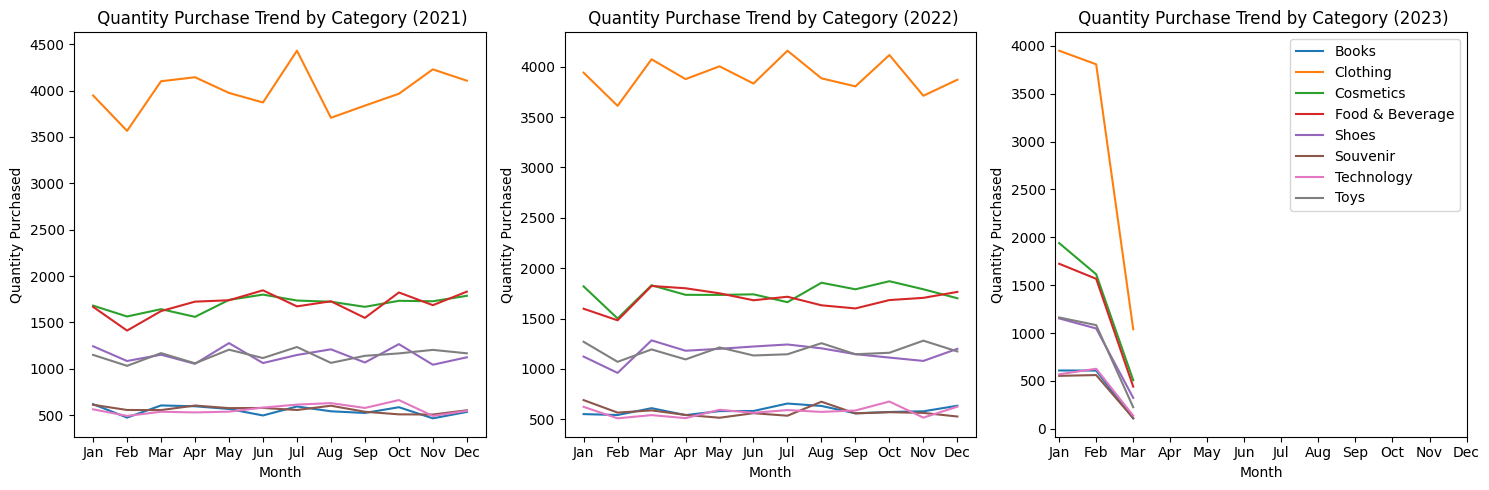

In [5]:
# Converting invoice dateto datetime
data['invoice_date'] = pd.to_datetime(data['invoice_date'])

# Extracting year and month from invoice date
data['invoice_year'] = data['invoice_date'].dt.year
data['invoice_month'] = data['invoice_date'].dt.month

# Group data by category, year, and month & sum up purchase quantities
category_monthly_purchase = data.groupby(['category', 'invoice_year', 'invoice_month'])['quantity'].sum().reset_index()

# Create subplots for each year
unique_years = data['invoice_year'].unique()
num_years = len(unique_years)

fig, axes = plt.subplots(1, num_years, figsize=(15, 5))

for i, year in enumerate(sorted(unique_years)):
    year_data = category_monthly_purchase[category_monthly_purchase['invoice_year'] == year]
    ax = axes[i]
    
    for category in year_data['category'].unique():
        category_data = year_data[year_data['category'] == category]
        ax.plot(category_data['invoice_month'], category_data['quantity'], label=category)
    
    ax.set_title(f' Quantity Purchase Trend by Category ({year})')
    ax.set_xlabel('Month')
    ax.set_ylabel('Quantity Purchased')
    
    # Adding legend to the last subplot of 2023
    if year == 2023 and i == num_years - 1:
        ax.legend()
    
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()


In [ ]:
# Aggregate data by invoice_month and category
agg_data = category_monthly_purchase.groupby(['invoice_month', 'category'])['quantity'].sum().reset_index()

# Pivot the aggregated data
pivot_table = agg_data.pivot(index='invoice_month', columns='category', values='quantity')

# Plot the category trends over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_table, markers=True)
plt.title('Category Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Total Purchase Quantity')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
# Pivot the data to create a matrix with categories as columns and months as index
pivot_table = category_monthly_purchase.pivot_table(index='invoice_month', columns='category', values='quantity', aggfunc='sum')

# Calculate the correlation matrix
category_corr = pivot_table.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(category_corr, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap of Categories')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
# Group data by category and calculate the total quantity purchased
category_total_purchase = data.groupby('category')['quantity'].sum().reset_index()

# Sort categories by total purchase quantity
category_total_purchase = category_total_purchase.sort_values(by='quantity', ascending=False)

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=category_total_purchase, x='quantity', y='category', palette='viridis')
plt.xlabel('Total Purchase Quantity')
plt.ylabel('Category')
plt.title('Total Purchase Quantity by Category')
plt.show()


In [ ]:
# Count unique and repeated customer IDs
unique_customer_ids = data['customer_id'].nunique()
repeated_customer_ids = data['customer_id'].duplicated().sum()
percentage_repeated_ids = (repeated_customer_ids / unique_customer_ids) * 100

print("Total Unique Customer IDs:", unique_customer_ids)
print("Total Repeated Customer IDs:", repeated_customer_ids)
print("Percentage of Repeated Customer IDs:", percentage_repeated_ids)
